# Lab5 exercises 1

### Intro
The main objective of this laboratory is to put into practice what you have learned on the Pandas data analysis library. This laboratory will let you carry out a preparatory data exploration analysis on two real-world datasets, to practice with the Pandas data analysis library and its advanced functionalities. If you have any doubts about the Pandas APIs, you can check the course material or the official documentation.

#### Preliminary steps

In [1]:
!test -e NYC_POIs.zip || wget "https://github.com/dbdmg/data-science-lab/raw/master/datasets/NYC_POIs.zip" -O NYC_POIs.zip
!test -e ny_municipality_pois_id.csv || unzip NYC_POIs.zip

#### Exericse 2.1.1
Load the New York Point Of Interest dataset exploiting Pandas APIs. Load the NY Municipality POIs ID metadata as well and filter out from the New York Point Of Interest data the records that do not belong to the New York municipality.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# plt.style.use('fast')
pd.options.display.max_rows = 10
plt.rcParams["figure.figsize"] = (12, 6)  # we are increasing the default figure size to 12x6 inches.


In [3]:
ny_pois_ids = np.loadtxt("ny_municipality_pois_id.csv")
print(f"Number of ids of POIs: {len(ny_pois_ids)}")

Number of ids of POIs: 53530


In [4]:
# This dictionary maps attributes in the table with correct data types
d_types = {'@type':str, '@lat':float, '@lon':float, 'amenity':str, 'name':str, 
           'shop':str, 'public_transport':str, 'highway':str}
all_pois_df = pd.read_csv("pois_all_info", sep='\t', index_col='@id', dtype=d_types)
print(f"Number of all POIs: {len(all_pois_df)}")

# Filter only POIS in NY municipality: intersection on indices
pois_df = all_pois_df.loc[ny_pois_ids]
print(f"Number of pois_df: {len(pois_df)}")
pois_df

Number of all POIs: 77884
Number of pois_df: 53550


,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN
...,...,...,...,...,...,...,...,...
2553096114,node,40.736006,-73.713202,NaN,NaN,NaN,NaN,NaN
2553096138,node,40.736020,-73.713063,NaN,NaN,NaN,NaN,NaN
2553096143,node,40.736024,-73.713047,NaN,NaN,NaN,NaN,NaN


In [5]:
pois_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53550 entries, 42432939 to 6146672068
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   @type             53550 non-null  object 
 1   @lat              53550 non-null  float64
 2   @lon              53550 non-null  float64
 3   amenity           24712 non-null  object 
 4   name              30550 non-null  object 
 5   shop              8717 non-null   object 
 6   public_transport  8376 non-null   object 
 7   highway           7559 non-null   object 
dtypes: float64(2), object(6)
memory usage: 3.7+ MB


In [6]:
pois_df['@type'].unique()
# @types contains the always the same values, so we can ignore it

array(['node'], dtype=object)

In [7]:
pois_df.describe()

,@lat,@lon
count,53550.000000,53550.000000
mean,40.720742,-73.936320
std,0.065739,0.078965
min,40.502423,-74.252791
25%,40.679971,-73.987065
50%,40.721492,-73.955369
75%,40.760094,-73.893479
max,40.913907,-73.700112


#### Exericse 2.1.2
For each column in the loaded dataset count the number of missing values.

In [8]:
pois_df.isna().sum()

@type                   0
@lat                    0
@lon                    0
amenity             28838
name                23000
shop                44833
public_transport    45174
highway             45991
dtype: int64

In [9]:
# Valid values
pois_df.notna().sum()

@type               53550
@lat                53550
@lon                53550
amenity             24712
name                30550
shop                 8717
public_transport     8376
highway              7559
dtype: int64

In [10]:
# Explore missing values
from collections import Counter

def get_categories():
    return ['amenity', 'shop', 'public_transport', 'highway']

cats = get_categories()

# Count NaNs per row and inspect their frequencies
check_df = pois_df[cats] 
row_nans = check_df.isna().sum(axis=1)
print(Counter(row_nans))

Counter({3: 37320, 4: 10208, 2: 6022})


#### Exericse 2.1.3
Now, analyze the distribution of the POI types for each POI category. Point of interest categories are amenity, shop, public_transport and highway. For each of them, plot a histogram showing the distribution of the types of POI. Note that, for certain categories, due to the high number of types, bars and labels could not fit adequately in the figure. Hence, fix a threshold (a percentage one is better) and plot only the most frequent types.
To simplify the subsequent analysis, use the retained top frequent POI types also for the following exercises.

In this exercise, we can retain only the top 80% frequent types of each category

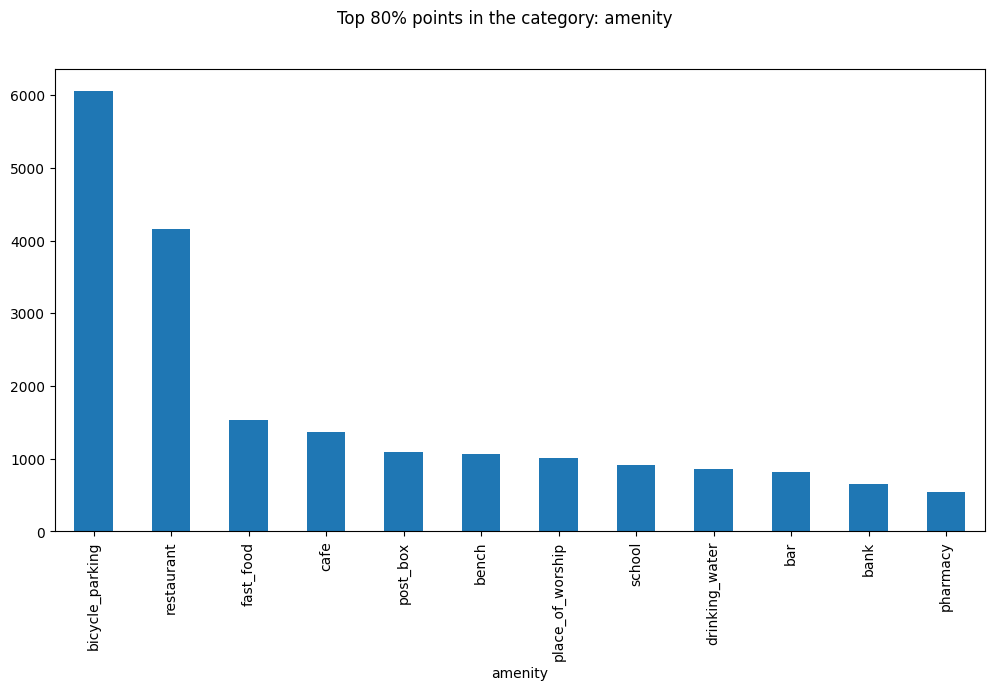

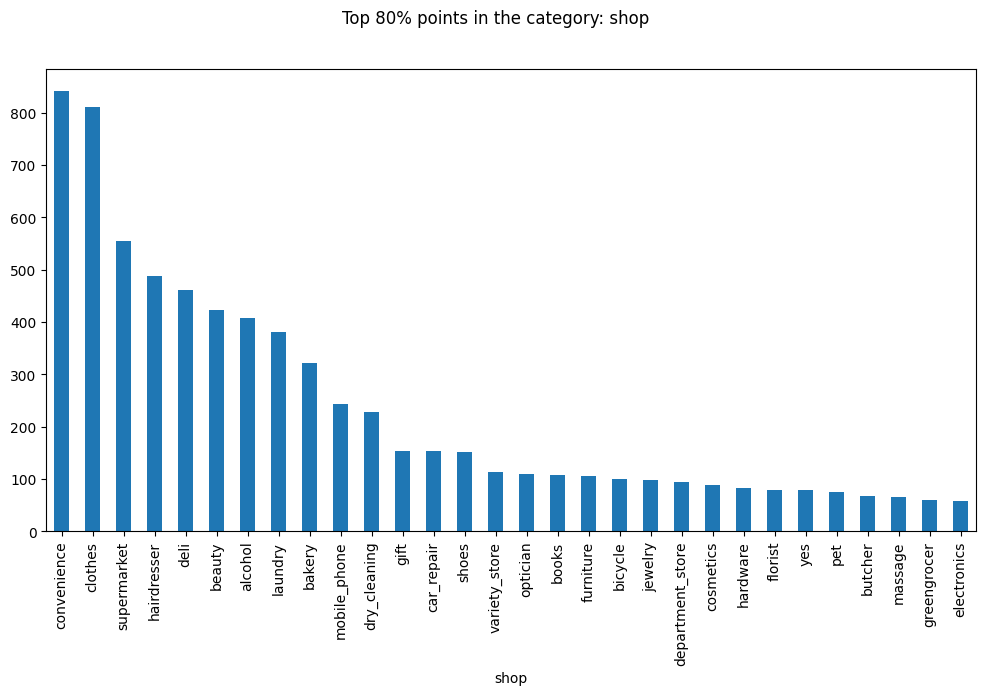

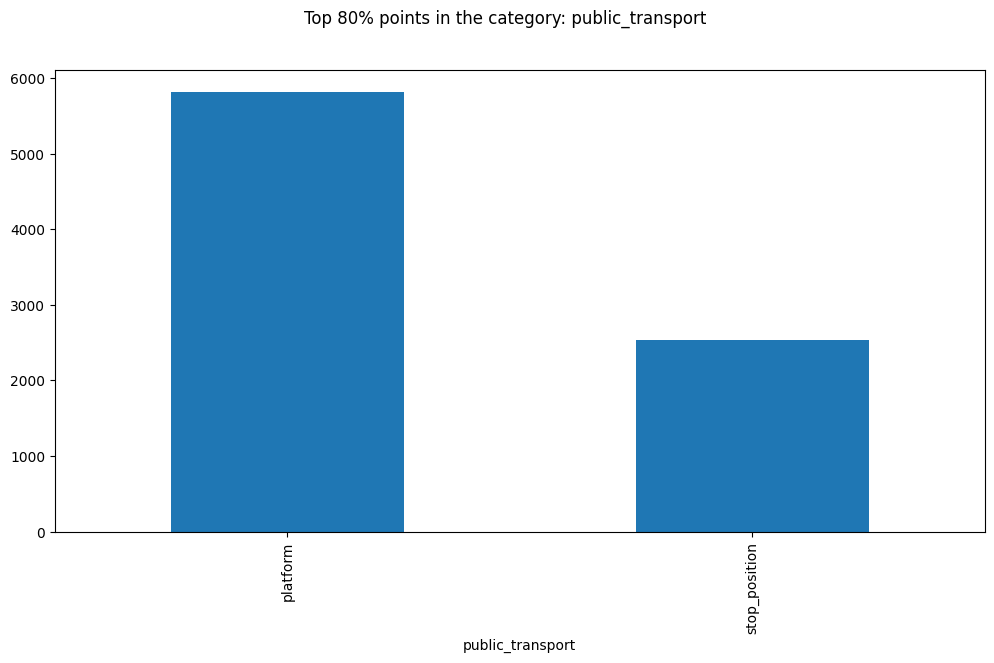

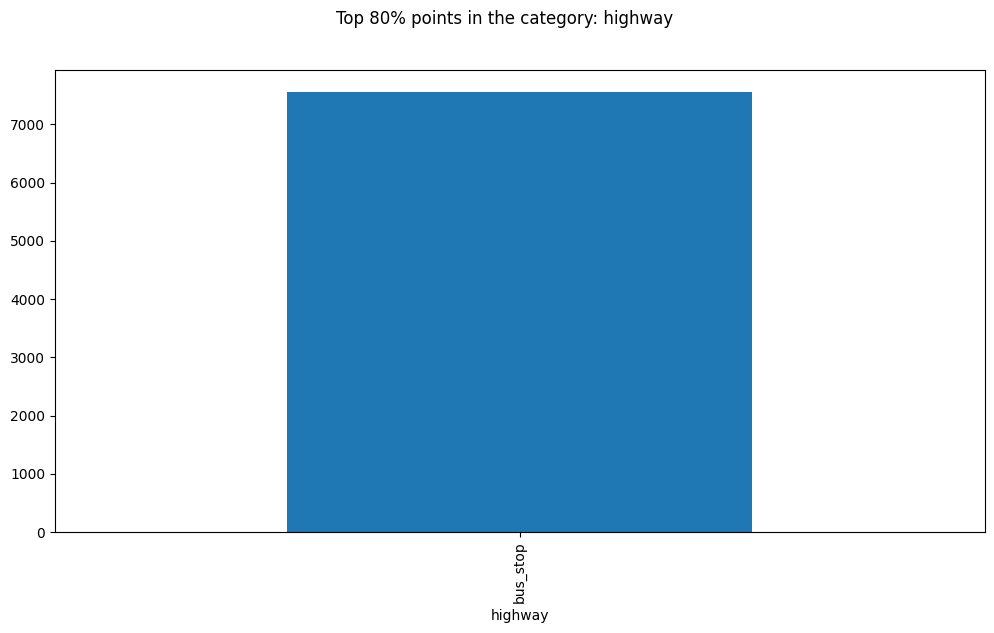

In [11]:
def get_top_perc(series, perc_value=.8):
    perc = series.cumsum() / series.sum()
    arg = (perc >= perc_value).values.argmax()
    return series.iloc[:arg+1]
    
for col in get_categories():
    p = .8
    valc = pois_df[col].value_counts()
    valf = get_top_perc(valc, p)
    fig, ax = plt.subplots()
    valf.plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    fig.suptitle(f"Top {p*100:.0f}% points in the category: {col}")

In [12]:
# Just counting
print(pois_df["highway"].value_counts())
print()
print(Counter(pois_df["highway"]))
print()
print(pois_df["public_transport"].value_counts())

highway
bus_stop    7558
crossing       1
Name: count, dtype: int64

Counter({nan: 45991, 'bus_stop': 7558, 'crossing': 1})

public_transport
platform         5821
stop_position    2530
station            16
stop_area           8
stop                1
Name: count, dtype: int64


#### Exericse 2.1.4
Show the points of interest on the New York map for a given category (e.g. amenity). To do so, you have to define a new function (or a new class) that, given the name of the POI category is able to show a scatter plot of the locations of the POI types, onto the New York municipality map, with a different color for each category.

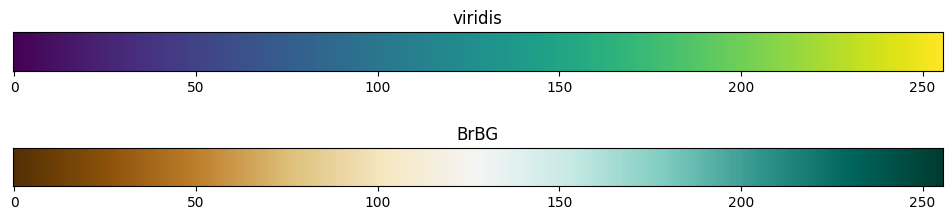

In [13]:
from matplotlib import colormaps

x = np.linspace(0, 1, 256)
x = np.vstack((x, x))
fig, axes = plt.subplots(nrows=2, figsize=(12,2))
plt.subplots_adjust(hspace=2) # adjust the vertical space between subplots

for ax, name in zip(axes, ['viridis', 'BrBG']):
    ax.imshow(x, aspect='auto', cmap=plt.get_cmap(name))
    ax.grid(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(name)

In [14]:
# import seaborn as sns  # for version 2

class Map:
    def __init__(self, df):
        """Store Dataset with POIs information."""
        self.pois_df = df
        self.lat_min = df['@lat'].min()
        self.lat_max = df['@lat'].max()
        self.long_min = df['@lon'].min()
        self.long_max = df['@lon'].max()
        
    def plot_map(self):
        """Display an image with NY map and return the Axes object."""
        fig, ax = plt.subplots()
        nyc_img = plt.imread('./New_York_City_Map.PNG')
        ax.imshow(nyc_img, zorder=0, extent=[self.long_min,
            self.long_max, self.lat_min, self.lat_max])
        ax.grid(False)
        return ax
        
    def plot_pois(self, ax, category, mask):
        """Plot data on specified Axis."""
        df = self.pois_df.loc[mask]

        # Edit to have labels ordered
        ordered_types = df[category].value_counts().index.values
        
        # Version 1: using pandas
        # types = df[category].unique()
        cmap = colormaps['viridis']
        colors = cmap(np.linspace(0, 1, ordered_types.size))
        for i, t in enumerate(ordered_types):
            df_t = df.loc[df[category] == t]
            c = [colors[i]] *  df_t.shape[0]
            df_t.plot.scatter(x='@lon', y='@lat', ax=ax, c=c, alpha=.5, label=f"{t} ({df_t.shape[0]})")

        ax.legend()
        ax.grid(False)
        ax.set_title(f"POIs in NY municipality: {category}")
        return ax

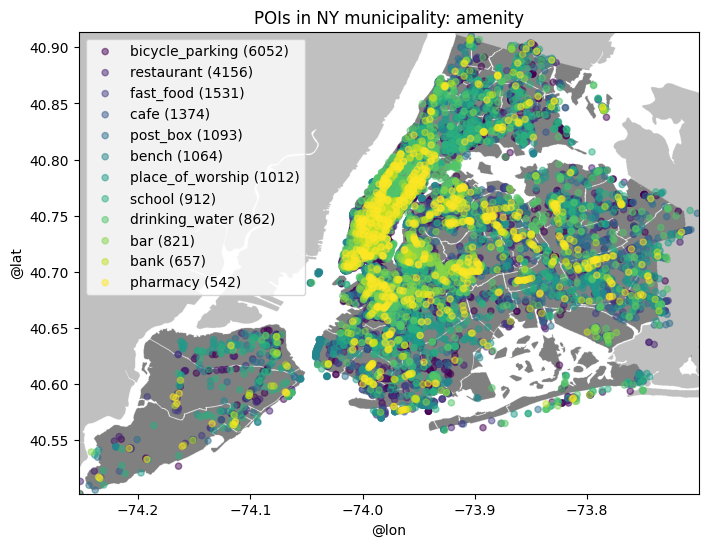

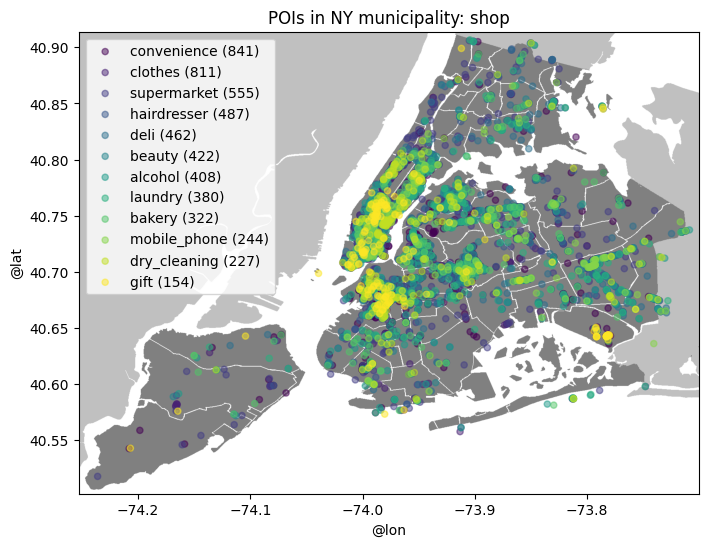

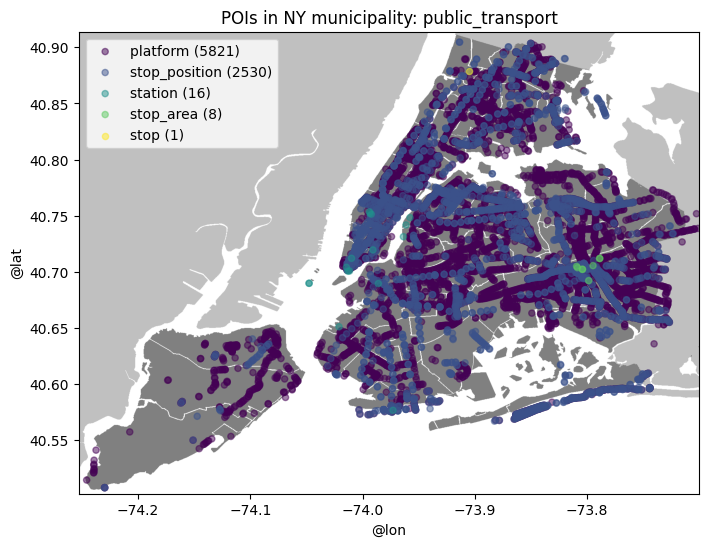

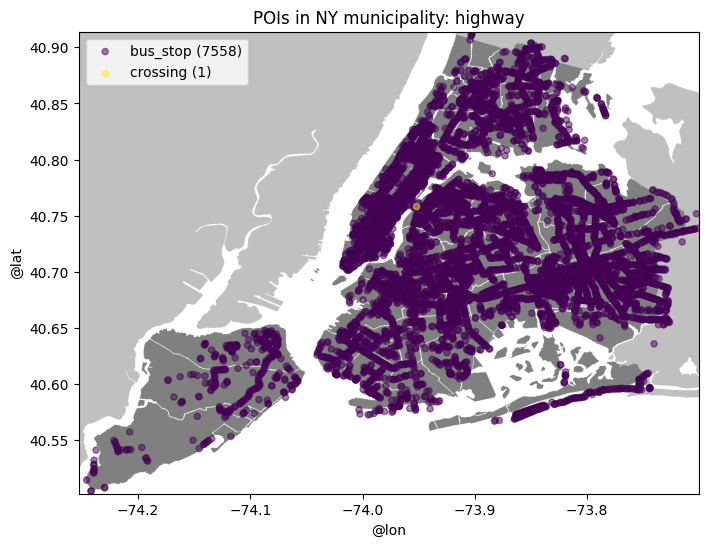

In [15]:
def show_category_on_map(df, column, perc_value):
    """
    Plot the New York map with POIs of a specific category.
    Only the top 'perc_value'% frequent types are plotted.
    """
    counts = df[column].value_counts()
    top_freq = get_top_perc(counts, perc_value)
    ny_map = Map(df)
    
    ax = ny_map.plot_map()
    mask = df[column].isin(top_freq.index)
    ny_map.plot_pois(ax, column, mask)

# for col in get_categories():
#     show_category_on_map(pois_df, col, .8)

show_category_on_map(pois_df, 'amenity', .8)
show_category_on_map(pois_df, 'shop', .6)
show_category_on_map(pois_df, 'public_transport', 1)
show_category_on_map(pois_df, 'highway', 1)

#### Exericse 2.1.5
Discretize the POIs by geographical position. Define a new function (or class) that is able to split the geographical position of the POIs using a grid. Once defined the grid over the New York municipality, the function has to assign each POI to the cell to which it belongs to. The result should be a Pandas DataFrame with a new column containing the cell_id for each POI.

In [16]:
class CellConverter:
    def __init__(self, df, n_splits):
        self.lat_min = df['@lat'].min()
        self.lat_max = df['@lat'].max()
        self.long_min = df['@lon'].min()
        self.long_max = df['@lon'].max()
        self.n_splits = n_splits
    
    def plot_grid(self, ax):
        lat_steps = np.linspace(self.lat_min, self.lat_max, self.n_splits + 1)
        long_steps = np.linspace(self.long_min, self.long_max, self.n_splits + 1)
        ax.hlines(lat_steps, self.long_min, self.long_max)
        ax.vlines(long_steps, self.lat_min, self.lat_max)
    
    def point_to_cell_coord(self, long, lat):
        x = int((long - self.long_min)/(self.long_max - self.long_min)*self.n_splits)
        y = int((lat - self.lat_min)/(self.lat_max - self.lat_min)*self.n_splits)
        return x, y
    
    def point_to_cell_id(self, long, lat):
        x, y = self.point_to_cell_coord(long, lat)
        return y * n_splits + x

n_splits = 20
cell_conv = CellConverter(pois_df, n_splits)

pois_df['cell_id'] = pois_df.apply(lambda x: cell_conv.point_to_cell_id(x['@lon'], x['@lat']), axis=1)
pois_df.head()

,@type,@lat,@lon,amenity,name,shop,public_transport,highway,cell_id
@id,,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN,310
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN,250
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN,337
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN,353
42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN,197


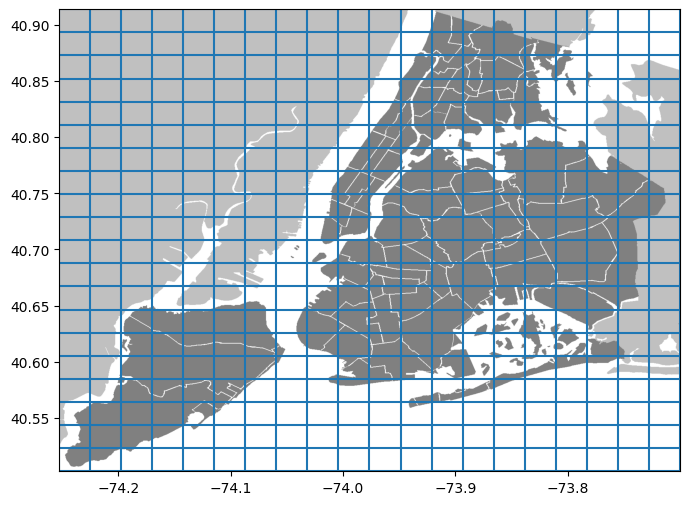

In [17]:
yet_another_map = Map(pois_df)
ax = yet_another_map.plot_map()
cell_conv.plot_grid(ax)

#### Exericse 2.1.6
Now you have to identify how many times a POI type is contained in each cell, for each category. Create a new DataFrame containing the cell_id as index, the POI types as columns and the count of the occurrences of each type, in each cell, as values.

In [18]:
def get_df_count(df, column, perc_value):
    counts = df[column].value_counts()
    top_freq = get_top_perc(counts, perc_value)
    mask = df[column].isin(top_freq.index)
    freq_df = df.loc[mask]

    # for each cell_id count the number of POIs for each type
    count_dframe = []
    for cell_id in range(n_splits**2):
        count_vals = freq_df.loc[freq_df['cell_id'] == cell_id][column].value_counts()
        count_vals.name = cell_id
        count_dframe.append(count_vals)

    cells_features_df = pd.DataFrame(count_dframe)
    cells_features_df = cells_features_df.fillna(0)
    return cells_features_df

In [19]:
amenities_df = get_df_count(pois_df, 'amenity', .6)
amenities_df

amenity,restaurant,post_box,fast_food,bicycle_parking,cafe,bench
0,2.0,2.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0


#### Exericse 2.1.7
For the categories amenities and shop identify if there exist a correlation between the location of dif- ferent POI types. Compute the pairwise correlation between the columns of the cell-type DataFrame and show it through a heatmap chart.

• Are you able to identify which are the POI types more correlated between each other? What does it mean?

• Which are the more correlated tuples? Do they belong to the same category?

In [20]:
shops_df = get_df_count(pois_df, 'shop', .6)
shops_df

shop,supermarket,convenience,gift,alcohol,clothes,bakery,beauty,laundry,hairdresser,deli,mobile_phone,dry_cleaning
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
final_df = pd.concat([amenities_df, shops_df], axis=1)
final_df


,restaurant,post_box,fast_food,bicycle_parking,cafe,bench,supermarket,convenience,gift,alcohol,clothes,bakery,beauty,laundry,hairdresser,deli,mobile_phone,dry_cleaning
0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
final_corr = final_df.corr()
final_corr.head()

,restaurant,post_box,fast_food,bicycle_parking,cafe,bench,supermarket,convenience,gift,alcohol,clothes,bakery,beauty,laundry,hairdresser,deli,mobile_phone,dry_cleaning
restaurant,1.000000,0.738146,0.892643,0.933327,0.977129,0.325605,0.854280,0.698709,0.748171,0.893299,0.897885,0.934591,0.641513,0.533456,0.702188,0.527927,0.697886,0.779390
post_box,0.738146,1.000000,0.791383,0.757908,0.751239,0.464872,0.831700,0.732534,0.572624,0.854463,0.640424,0.730414,0.744983,0.700626,0.764960,0.669046,0.747977,0.802623
fast_food,0.892643,0.791383,1.000000,0.823712,0.931877,0.463410,0.762383,0.707077,0.808271,0.856165,0.790148,0.759500,0.726217,0.557794,0.758824,0.574192,0.776886,0.822514
bicycle_parking,0.933327,0.757908,0.823712,1.000000,0.922268,0.381228,0.858209,0.633704,0.662442,0.873462,0.839809,0.888446,0.673453,0.522363,0.745809,0.490781,0.607225,0.793769
cafe,0.977129,0.751239,0.931877,0.922268,1.000000,0.407526,0.813572,0.694446,0.786491,0.901696,0.875035,0.874180,0.657689,0.508593,0.732542,0.480233,0.690048,0.813883


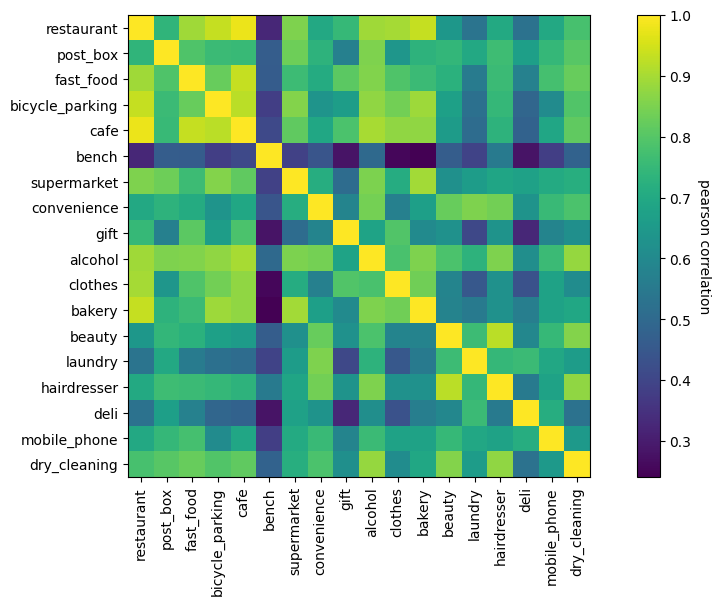

In [23]:
fig, ax = plt.subplots()
im = ax.imshow(final_corr)
ax.set_xticks(np.arange(final_corr.columns.size))
ax.set_yticks(np.arange(final_corr.columns.size))
ax.set_xticklabels(final_corr.columns)
ax.set_yticklabels(final_corr.columns)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va="center",
         rotation_mode="anchor") # rotate labels on x-axis
cbar = ax.figure.colorbar(im, ax=ax)
_ = cbar.ax.set_ylabel('pearson correlation', rotation=-90, va="bottom")